# Contents

1) Contents

2) Problem Statement

3)Importing Libraries

4)Load libraries

 * Load and explore the dataset

5) Summarize Data

*  Describing the data

6)Numerical Description

7) Checking the data

* Data Cleaning

* Split-out validation dataset

8) EDA

* Univariate

* Bivariate

* Multivariate

9) Model Building

* Assigning the data

* Splitting the data

10) Models

* Logistic regression

11) Conclusion

# Problem statement:

- In this project, we will use a standard imbalanced machine learning dataset referred to as the “Glass Identification” dataset, or simply “glass.”



- The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987.



- Ignoring the sample identification number, there are nine input variables that summarize the properties of the glass dataset; they are:




- RI: refractive index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

# Importing libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
import statsmodels.api as sm 
import sys
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [8]:
tag =  pd.read_csv(r'C:\Users\Hitesh\Downloads\glass.tag', sep="/t")
tag.head(11)

,An original file donated by Vina Speihler
0,"ID, N -- numeric identifier of the instance"
1,"RI, N -- refractive index"
2,"NA2O, N -- Sodium oxide"
3,"MGO, N -- magnesium oxide"
4,"AL2O3, N -- aluminum oxide"
5,"SIO2, N -- silcon oxide"
6,"K2O, N -- potassium oxide"
7,"CAO, N -- calcium oxide"
8,"BAO, N -- barium oxide"
9,"FE2O3, N -- iron oxide"


In [9]:
colnames=['ID', 'RI', 'NA2O', 'MGO','AL2O3','SIO2','K2O','CAO','BAO','FE2O3','Type'] 
data =  pd.read_csv(r'C:\Users\Hitesh\Downloads\glass.data', sep=",",names=colnames, header=None)
data.head()

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
data.drop('ID', inplace=True, axis=1)

# Describing the data

- Glass type description:-
- Types Means (What do 1,2,3,5,6,7 Types describe/use of those glasses?)

Target Column Description(Type of glass - class attribute):

- 1 -> building_windows_float_processed
- 2 -> building_windows_non_float_processed
- 3 -> vehicle_windows_float_processed
- 4 -> vehicle_windows_non_floatprocessed (none in this database)
- 5 -> containers
- 6 -> tableware
- 7 -> headlamps

- Element types:-
- Features Means (What do 'RI,Na,Mg,Al,Si,K,Ca,Ba,Fe' mean?)

Feature Columns Description:

- RI -> refractive index
- Na -> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg -> Magnesium
- Al -> Aluminum
- Si -> Silicon
- Ca -> Potassium
- Ba -> Barium
- Fe -> Iron

# Numerical description

In [11]:
 data.describe()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


- When the Mean and Std values of each column are examined, the Std values of the "Type, Fe, Ba, K" columns are much higher than the Mean values. 
- This may have a negative impact on the performance of our models. After we've put up our models, we might be able to delete certain columns (save the Type column, which is a target column). 

# Checking the data

In [12]:
data.isnull().sum()

RI       0
NA2O     0
MGO      0
AL2O3    0
SIO2     0
K2O      0
CAO      0
BAO      0
FE2O3    0
Type     0
dtype: int64

- No null data is observed.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   NA2O    214 non-null    float64
 2   MGO     214 non-null    float64
 3   AL2O3   214 non-null    float64
 4   SIO2    214 non-null    float64
 5   K2O     214 non-null    float64
 6   CAO     214 non-null    float64
 7   BAO     214 non-null    float64
 8   FE2O3   214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


- They all consist of 214 rows, the columns are float type, the type column is integer type. Data is clean so far.
- We can proceed with EDA as the data is clean

# Exploratory data analysis(EDA)

## Univariate analysis

<AxesSubplot:xlabel='Type', ylabel='count'>

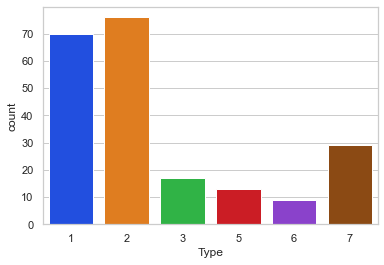

In [14]:
sns.set(style = 'whitegrid')
sns.color_palette("hls", 8)
sns.countplot(x="Type", data=data, palette='bright')

- The plot implies that the data is Imbalanced data! Therefore, we will use 'F1 Score' to evaluate models.

## Using SMOTE to Oversample the data

Text(0.5, 1.0, 'Before SMOTE')

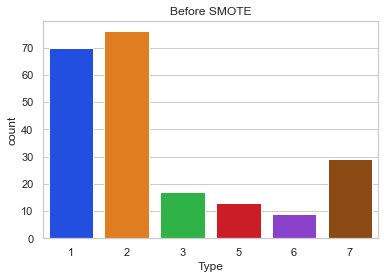

In [15]:
sns.set(style = 'whitegrid')
sns.countplot(x="Type", data=data,palette = 'bright').set_title('Before SMOTE')

Text(0.5, 1.0, 'After SMOTE')

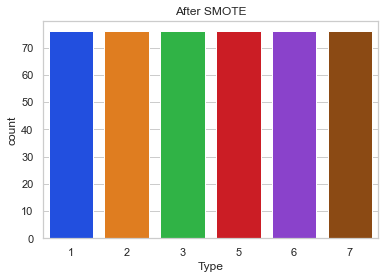

In [16]:
x = data.iloc[:,0:9]
y = data.iloc[:,9]


sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)
x_res, y_res = sm.fit_resample(x, y)
y_res_df = pd.DataFrame(y_res)


sns.set(style = 'whitegrid')
sns.countplot(x = y_res_df.Type, palette = 'bright').set_title('After SMOTE')

In [17]:
print(x_res.shape)
print(y_res.shape)

y_res.value_counts()

(456, 9)
(456,)


7    76
6    76
5    76
3    76
2    76
1    76
Name: Type, dtype: int64

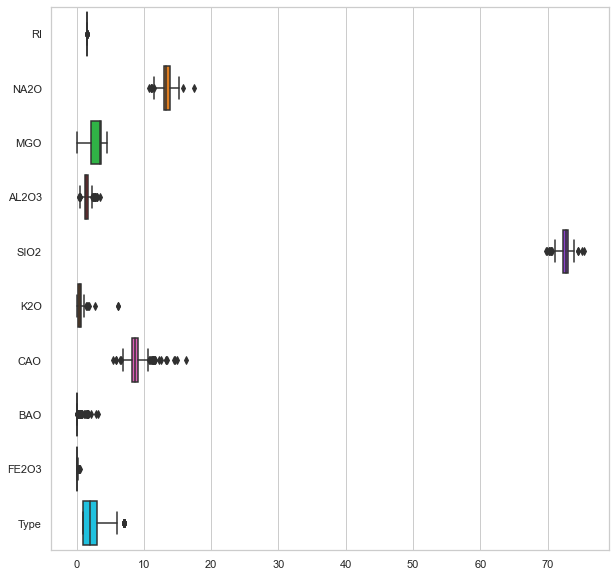

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient="h",palette='bright');

- Silicon is the main component of Glass making more than 70% of composition
- Combined Silicon, Sodium and Calcium make up around 90%
- Iron is the least important component

We should prefer to use models without outlier treatment, in many cases it can improve the model performance.
But it also leads to change of information which might alter real/practical situation in our case.

## Bivariate analysis

The tagert variable is "type" so the bivariate analysis is carried on the target variable and other variables.

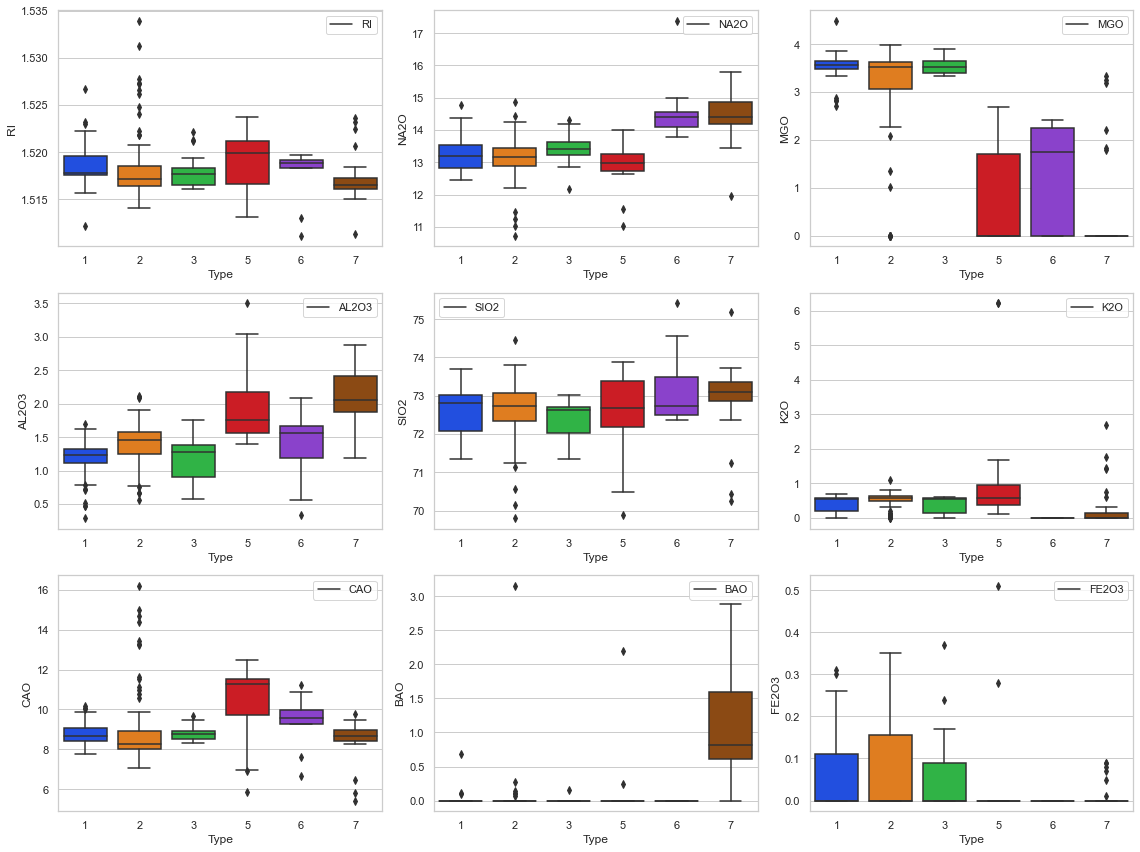

In [19]:
cols = ['RI','NA2O','MGO','AL2O3','SIO2','K2O','CAO','BAO','FE2O3']
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    sns.boxplot("Type", col, ax = ax[i], data=data,palette='bright')
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

- Refractive index lies between 1.51 and 1.54
- Type 6 and 7 have higher Na %
- Type 1,2 and 3 have higher Mg %
- Type 5 and 7 have higher Al %
- Si % is similar in all types
- Type 6 has no K composition
- Type 5 and 6 have higher Ca composition
- Ba is mostly used in Type 7
- Fe is used in Type 1,2 and 3

## Multivariate analysis

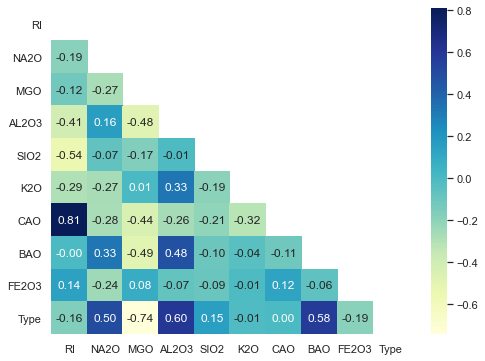

In [20]:
plt.figure(figsize=(8,6))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()

- The highest correlation is between 'RI' and 'Cao,' with a value of 0.81, implying that when one rises, the other rises, and vice versa. 
- The minimum or maximum negative correlation between 'MGO' and 'Type' is -0.74, which means that when one lowers, the other rises.
- But coming to the target variable the higher realtion is with 'AL2O3' and 'BAO' which coresponds to '0.6' & '0.58' respectively.

# Model building

## Assigning the data

In [21]:
#x = data.iloc[:,0:9]
#x.head(3)

In [22]:
#y = data.iloc[:,9]
#y.head()

## Splitting the data

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = .2, random_state = 40, stratify = y_res)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

- Splitting of data into training and testing set is accomplished

# Models

## Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=86)
logr.fit(x_train,y_train)
y_pred = logr.predict(x_test)

### Confusion matrix and f1 score

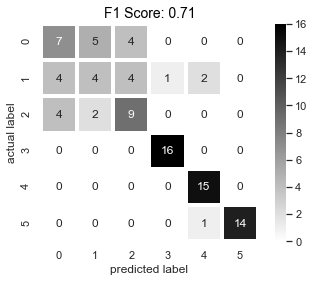

In [25]:
f1_score_logr = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_logr:.2f}',size=14,color='black')
plt.show()

### Classification report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.47      0.44      0.45        16
           2       0.36      0.27      0.31        15
           3       0.53      0.60      0.56        15
           5       0.94      1.00      0.97        16
           6       0.83      1.00      0.91        15
           7       1.00      0.93      0.97        15

    accuracy                           0.71        92
   macro avg       0.69      0.71      0.69        92
weighted avg       0.69      0.71      0.69        92



In [27]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy)

Accuracy: 0.71


### Recursive feature elimination

In [28]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(logr,7)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(random_state=86), n_features_to_select=7)

In [29]:
rfe.support_
x_train.columns[rfe.support_]

Index(['NA2O', 'MGO', 'AL2O3', 'K2O', 'CAO', 'BAO', 'FE2O3'], dtype='object')

In [30]:
x1_train=x_train[['NA2O', 'MGO', 'AL2O3', 'K2O', 'CAO', 'BAO', 'FE2O3']]
x1_test=x_test[['NA2O', 'MGO', 'AL2O3', 'K2O', 'CAO', 'BAO', 'FE2O3']]

### Checking the accuaracy with RFE

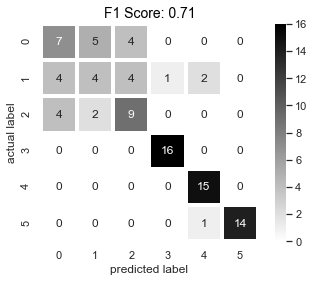

In [31]:
logr.fit(x1_train,y_train)
y1_pred = logr.predict(x1_test)

# confusion matrix and f1 score
f1_score_logr = f1_score(y_test,y_pred, average='micro')
cm_logr= confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_logr:.2f}',size=14,color='black')
plt.show()

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.47      0.44      0.45        16
           2       0.36      0.27      0.31        15
           3       0.53      0.60      0.56        15
           5       0.94      1.00      0.97        16
           6       0.83      1.00      0.91        15
           7       1.00      0.93      0.97        15

    accuracy                           0.71        92
   macro avg       0.69      0.71      0.69        92
weighted avg       0.69      0.71      0.69        92



In [33]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %.2f' % accuracy)

Accuracy: 0.71


- As we can see there is not much diffence in the f1 score 
- Hence we can either use or choose not to use RFE

### Checking the accuaracy after hyperparameter with Grid search cv

In [34]:
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logr, param_grid, cv =10)

logreg_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
Best score is 0.6354978354978355


- Tuning in the value of c we get a better score when compared.

### Results with tuning in hyperparameter

In [35]:
logr = LogisticRegression(random_state=0,C= 2275.845926074791)
logr.fit(x1_train,y_train)
y_pred = logr.predict(x1_test)

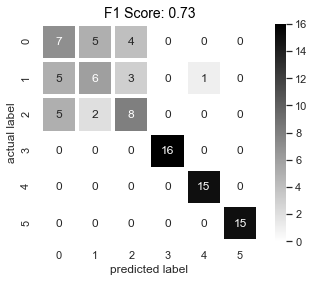

In [36]:
f1_score_log = f1_score(y_test,y_pred, average='micro')
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='gist_yarg',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_log:.2f}',size=14,color='black')
plt.show()

- Here we can see the results obtained are slightly higher to those without tuning in hyperparameters hence there is increase in accuracy and the parameter either can be neglected  or taken into consideration.

# Conclusion

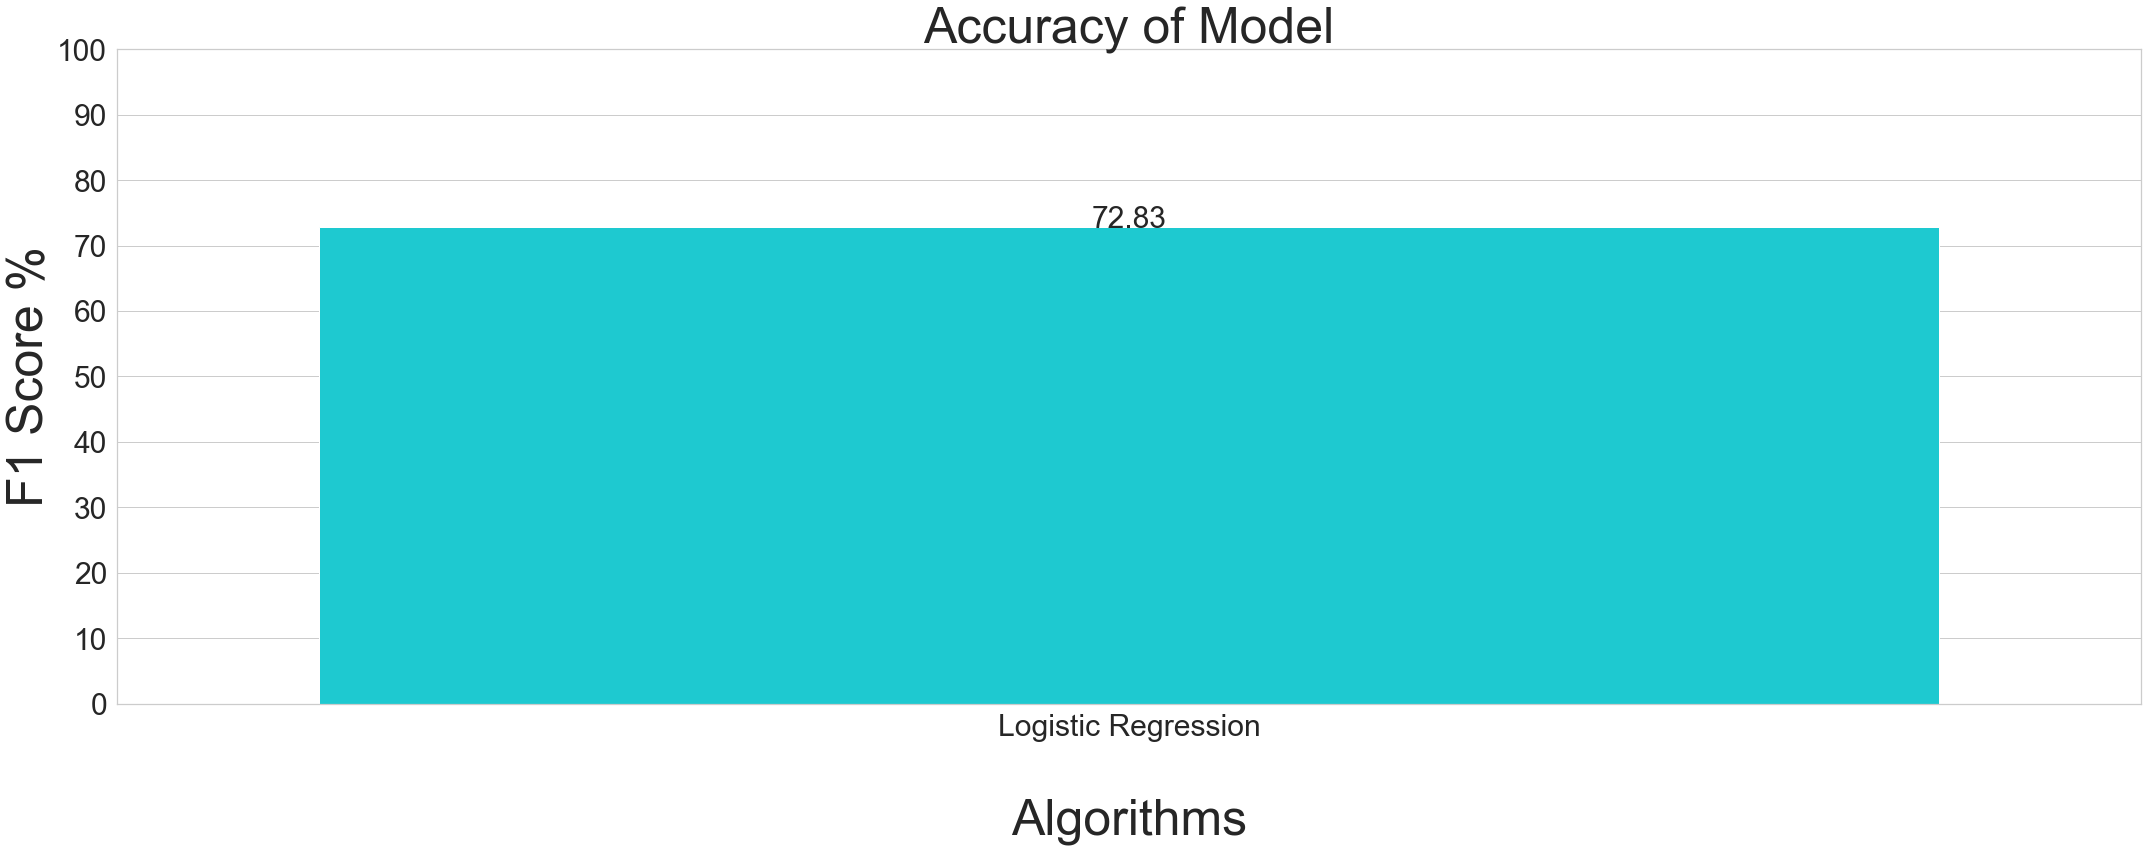

In [41]:
# F1 Scores Comparison on a Bar Chart
dict_Scores = {'Logistic Regression': f1_score_log*100
              }

colors = [ "#00e5ee"]
sns.set_style("whitegrid")
plt.figure(figsize=(30,12))
plots=sns.barplot(x=list(dict_Scores.keys()), y=list(dict_Scores.values()), palette=colors)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=30, xytext=(0, 8),
                   textcoords='offset points')
plt.yticks(np.arange(0,101,10), size = 30)
plt.xticks(fontsize=30)
plt.title('Accuracy of Model', fontsize=50)
plt.ylabel("F1 Score %", fontsize=50)
plt.xlabel("\nAlgorithms", fontsize=50)
plt.tight_layout()
plt.show()